In [65]:
pip install pytesseract

You should consider upgrading via the 'C:\Users\YOUGANK\anaconda3\python.exe -m pip install --upgrade pip' command.


In [66]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\YOUGANK\anaconda3\python.exe -m pip install --upgrade pip' command.


In [141]:
import cv2 
from matplotlib import pyplot as plt 
import numpy as np 
import easyocr
import imutils
import random 
import os

# Create a video capture object, in this case we are reading the video from a file
vid_capture = cv2.VideoCapture('Sample_Video1.mp4')

if (vid_capture.isOpened() == False):
    print("Error opening the video file")
# Read fps and frame count
else:
    # Get frame rate information
    # You can replace 5 with CAP_PROP_FPS as well, they are enumerations
    fps = vid_capture.get(5)
    print('Frames per second : ', fps,'FPS')

    # Get frame count
    # You can replace 7 with CAP_PROP_FRAME_COUNT as well, they are enumerations
    frame_count = vid_capture.get(7)
    print('Frame count : ', frame_count)

while(vid_capture.isOpened()):
    # vid_capture.read() methods returns a tuple, first element is a bool 
    # and the second is frame
    ret, frame = vid_capture.read()
    if ret == True:
        cv2.imshow('Frame',frame)
        # 20 is in milliseconds, try to increase the value, say 50 and observe
        key = cv2.waitKey(20)

        if key == ord('q'):
            break
    else:
        break

# Release the video capture object
vid_capture.release()
cv2.destroyAllWindows()

Frames per second :  25.045289855072465 FPS
Frame count :  553.0


In [68]:
vidcap = cv2.VideoCapture('Sample_Video1.mp4')
success,image = vidcap.read()
count = 0;
print ("I am in success")
while success:
    success,image = vidcap.read()
    cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file
    if cv2.waitKey(10) == 27:                     # exit if Escape is hit
        break
    count += 1

I am in success


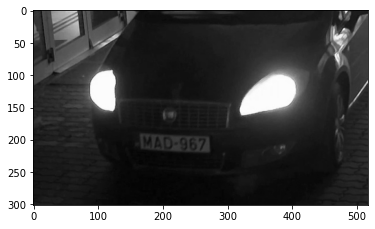

In [142]:
img = cv2.imread("frame-553.png")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

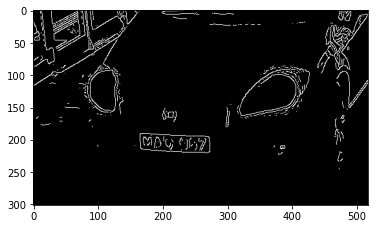

In [131]:
bfilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bfilter,30,30)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [132]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [133]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [134]:
location

array([[[165, 191]],

       [[167, 214]],

       [[273, 218]],

       [[271, 195]]], dtype=int32)

In [135]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

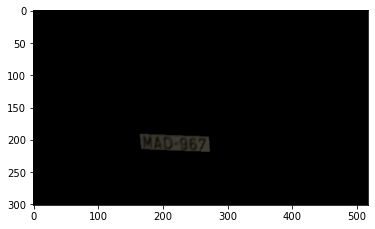

In [136]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [137]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

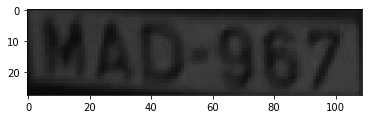

In [138]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [139]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [106, 0], [106, 28], [0, 28]], 'Mad-967', 0.48687072619753)]

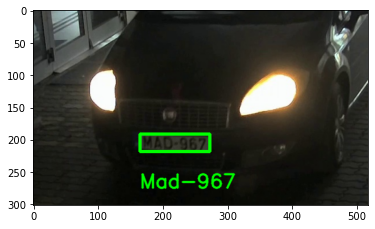

In [140]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))